In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train=pd.read_csv("/content/train (3).csv")
test=pd.read_csv("/content/test (1).csv")
gender=pd.read_csv("/content/gender_submission.csv")

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
gender.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [ ]:
combined_df = pd.concat([train, test], ignore_index=True)

In [ ]:
print(combined_df.info())
print(combined_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.02006

In [ ]:
combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)

combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
label_encoder = LabelEncoder()
combined_df['Sex'] = label_encoder.fit_transform(combined_df['Sex'])
combined_df['Embarked'] = label_encoder.fit_transform(combined_df['Embarked'])


In [ ]:
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch']


In [ ]:
train_df = combined_df[:len(train)]
test_df = combined_df[len(train):]

In [ ]:
X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)

In [ ]:
print(accuracy)
print("Classification Report:\n", classification_rep)

0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       105
         1.0       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
       Feature  Importance
5        Fare    0.269755
1         Sex    0.266730
2         Age    0.250640
0      Pclass    0.071960
7  FamilySize    0.054724
6    Embarked    0.031452
3       SibSp    0.030781
4       Parch    0.023958


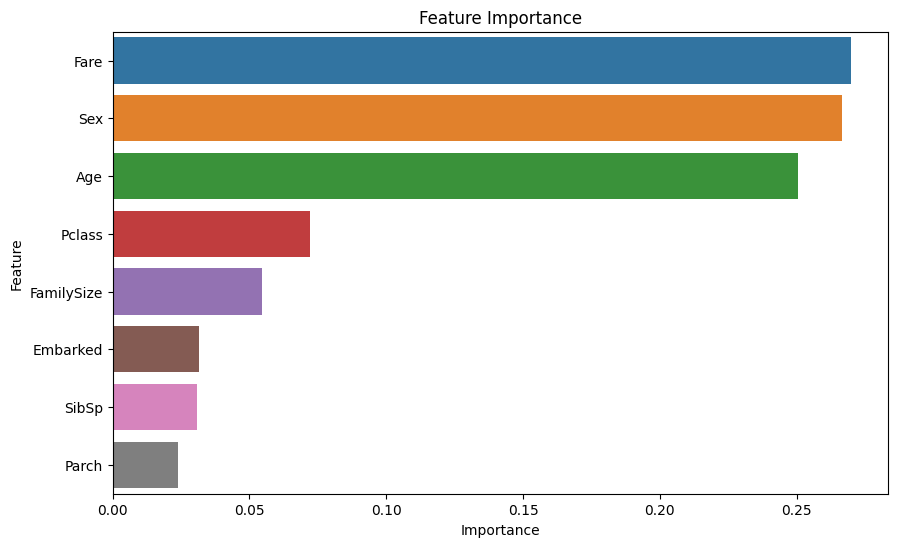

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
test_X = test_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_predictions = model.predict(test_X)

In [ ]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})
print(submission)

      PassengerId  Survived
891           892       0.0
892           893       0.0
893           894       0.0
894           895       1.0
895           896       0.0
...           ...       ...
1304         1305       0.0
1305         1306       1.0
1306         1307       0.0
1307         1308       0.0
1308         1309       0.0

[418 rows x 2 columns]


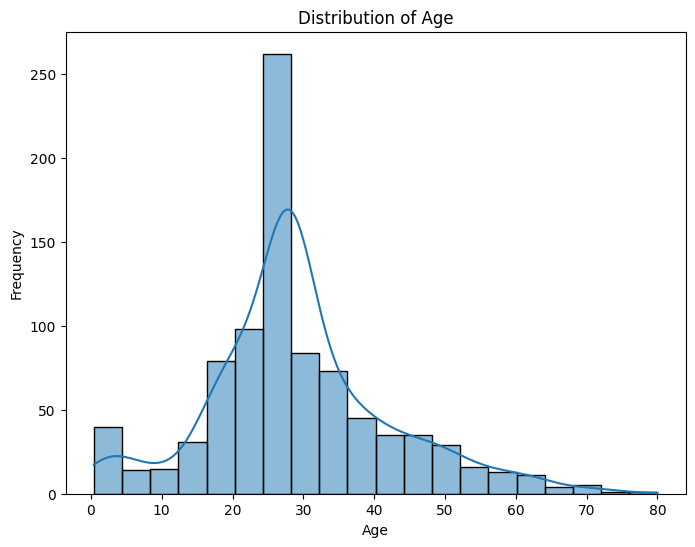

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency') #means in this dataset age of lot of people frequency  is between 20 to 30
plt.show()

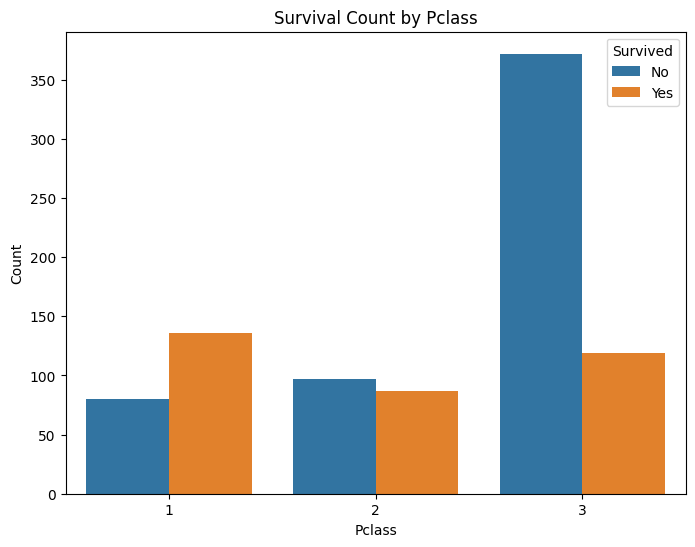

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()